# Data Science: Time Series Analysis [Revision]

https://cursos.alura.com.br/course/data-science-series-temporais

## Sales trend


### Upload a csv file with Alucar sales for 2017 and 2018 

In [1]:
import pandas as pd

In [2]:
alucar = pd.read_csv('data/alucar.csv')
alucar.head(5)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar.columns = ['month', 'sales']
alucar.head(5)

,month,sales
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


### Examine the file through pandas functions to find out the number of rows and columns present with the alucar.shape command

In [4]:
print(f'Rows: {alucar.shape[0]}')
print(f'Columns: {alucar.shape[1]}')

Rows: 24
Columns: 2


### Check for null data with the command alucar.isna().sum()

In [5]:
print(f'Null data: {alucar.isna().sum().sum()}')

Null data: 0


### Change the month type from object to datetime with the command alucar['month'] = pd.to_datetime(alucar['month'])

In [6]:
alucar['month'] = pd.to_datetime(alucar['month'])

In [7]:
alucar.dtypes

month    datetime64[ns]
sales             int64
dtype: object

### Import the necessary libraries to generate a sales chart

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

In [9]:
print(sns.__version__)

0.11.2


### Perfect the chart by including a new color palette, including appropriately sized title and labels better describing what the chart is about

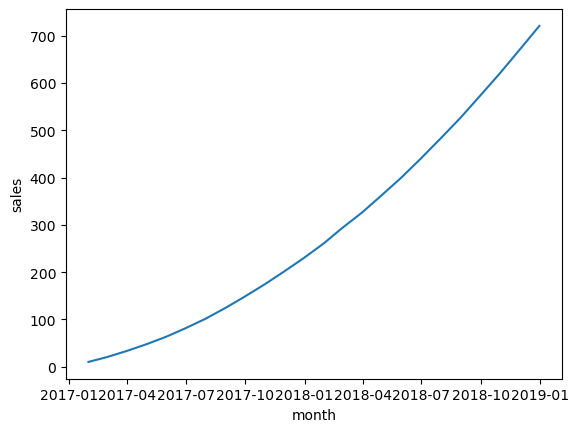

In [10]:
sns.lineplot(x = 'month', y = 'sales', data = alucar)
sns = sns

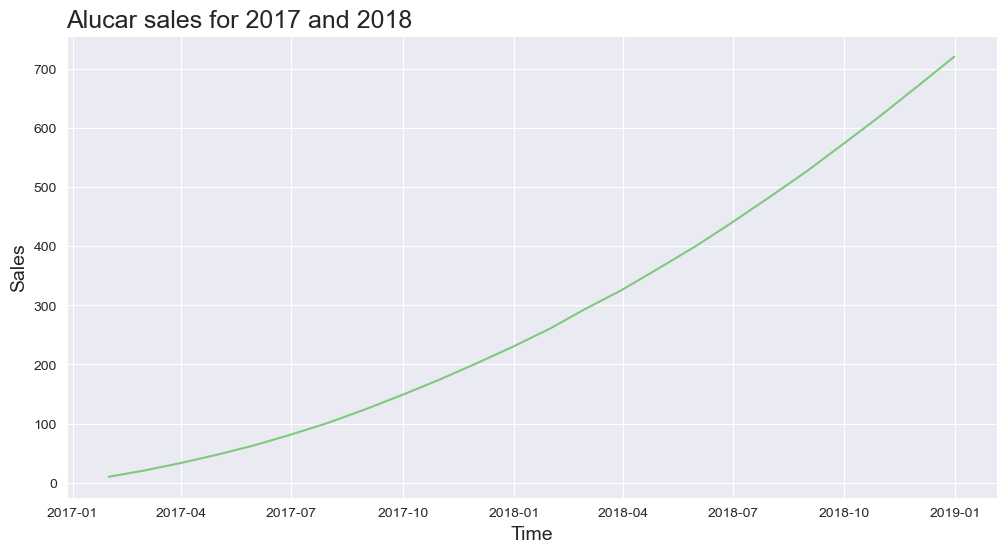

In [11]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'month', y = 'sales', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Alucar sales for 2017 and 2018', loc='left', fontsize = 18)
ax.set_xlabel('Time', fontsize = 14)
ax.set_ylabel('Sales', fontsize = 14)
ax = ax

## Decomposition and autocorrelation

### Create a function called to_plot() and plot_comparison() to generate standardized plots, avoiding duplicate code

In [12]:
def to_plot(title, labelx, labely, x, y, data):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y = y, data = data)
    ax.figure.set_size_inches(12,6)
    ax.set_title(title, loc='left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

In [13]:
def plot_comparison(x, y1, y2, y3, data, title):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(title,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=data)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=data)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=data)
    ax=ax

### Apply the Decomposition technique of a time series to measure month-to-month growth and use the diff() function to decompose the sales to create the increase, and the increase to find the acceleration

In [14]:
alucar['increase'] = alucar['sales'].diff()

In [15]:
alucar['acceleration'] = alucar['increase'].diff()

In [16]:
alucar.head(7)

,month,sales,increase,acceleration
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0
5,2017-06-30,81,18.0,2.0
6,2017-07-31,101,20.0,2.0


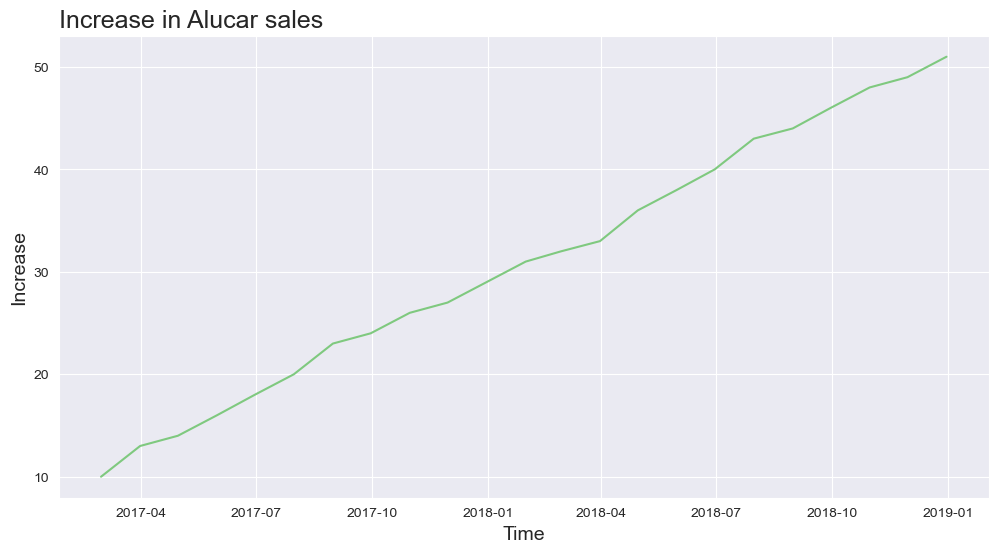

In [17]:
to_plot('Increase in Alucar sales', 'Time', 'Increase', 'month', 'increase', alucar)

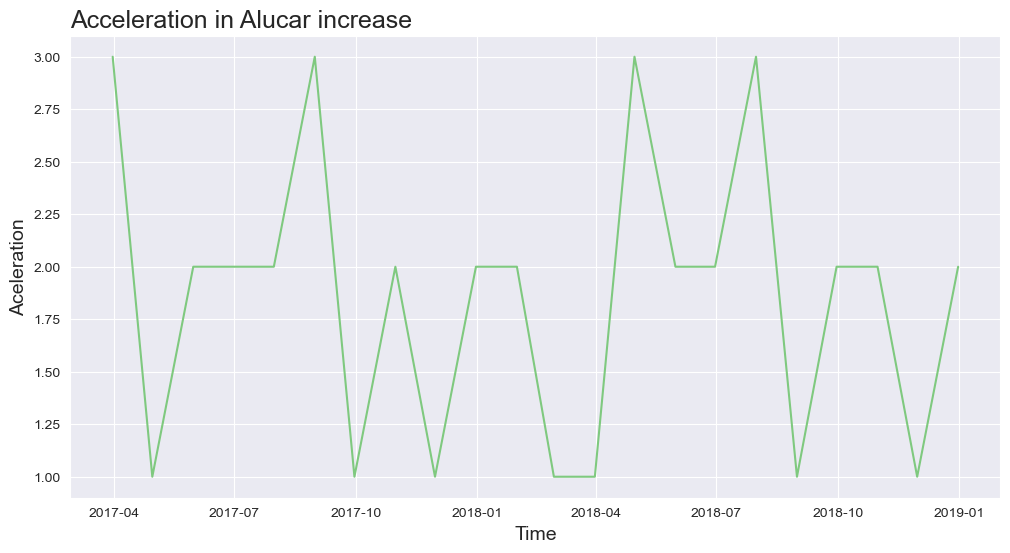

In [18]:
to_plot('Acceleration in Alucar increase', 'Time', 'Aceleration', 'month', 'acceleration', alucar)

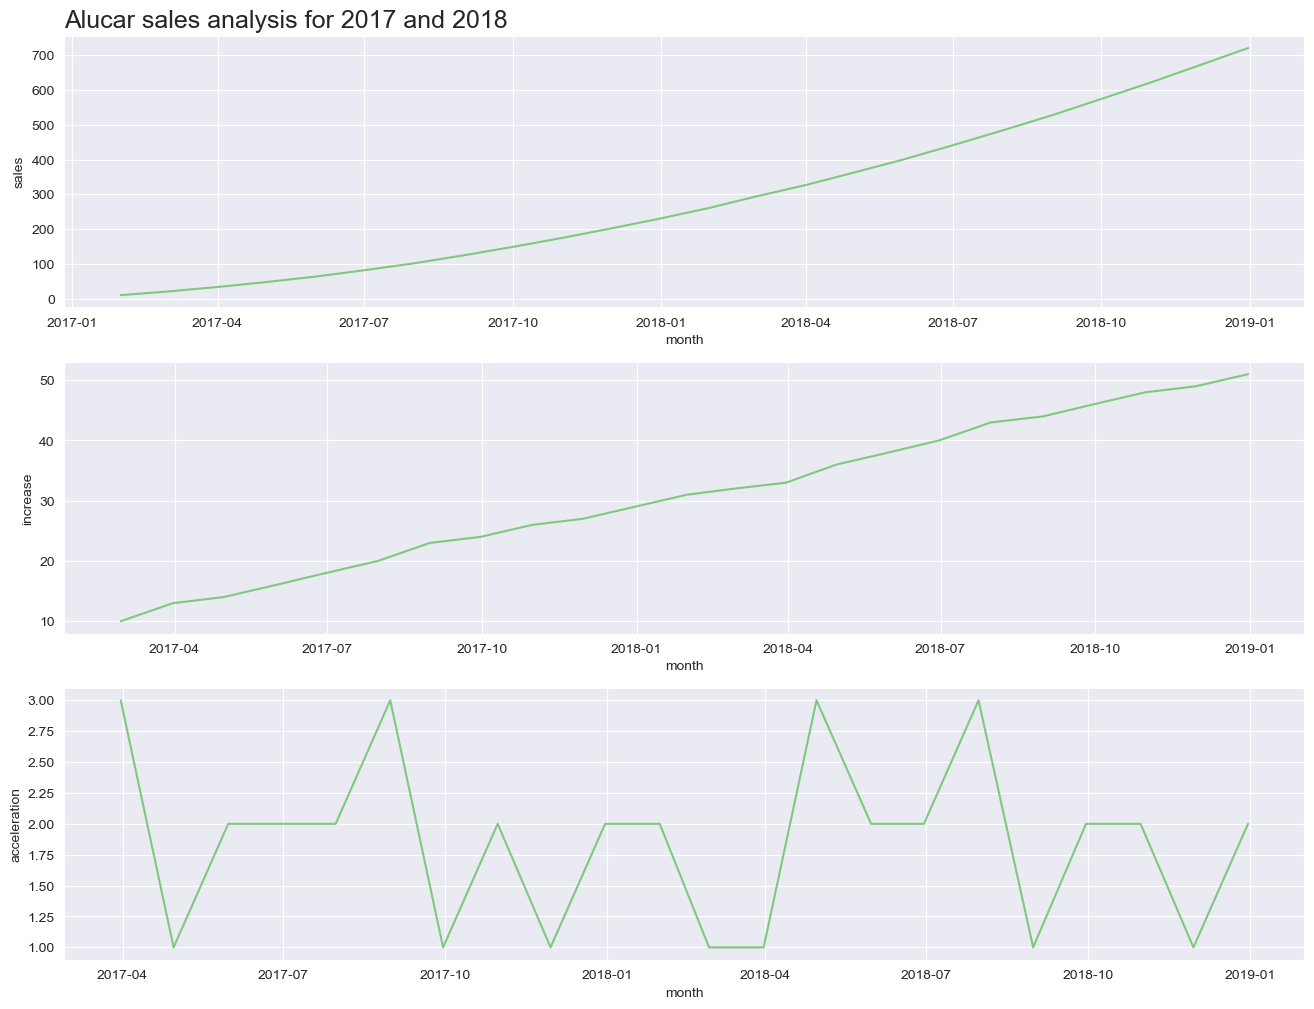

In [19]:
plot_comparison('month', 'sales', 'increase', 'acceleration', alucar, 'Alucar sales analysis for 2017 and 2018')

### Run the Autocorrelation function to find out the correlation level of sales, lift and acceleration

In [20]:
from pandas.plotting import autocorrelation_plot

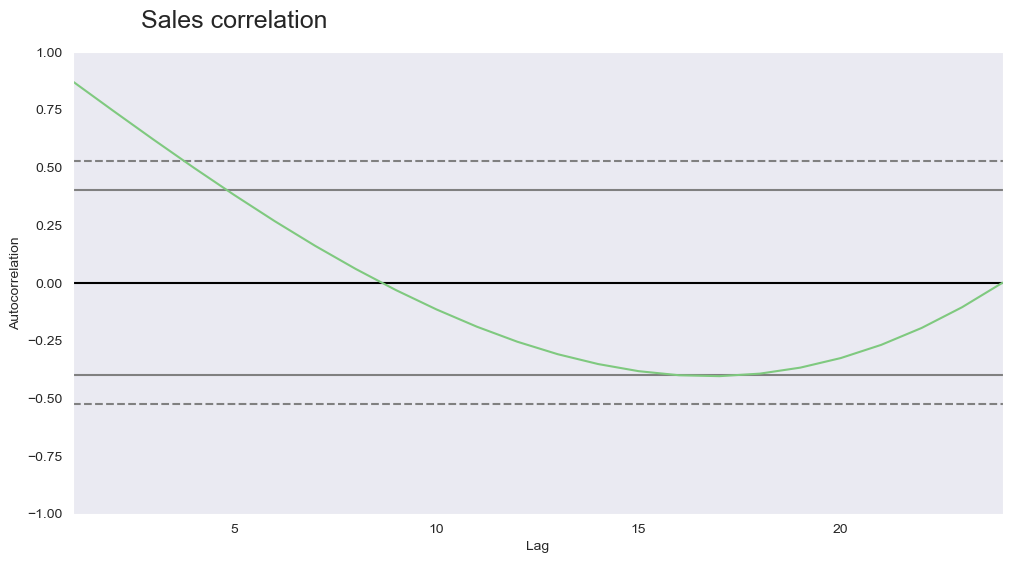

In [21]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Sales correlation', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['sales'])
ax = ax

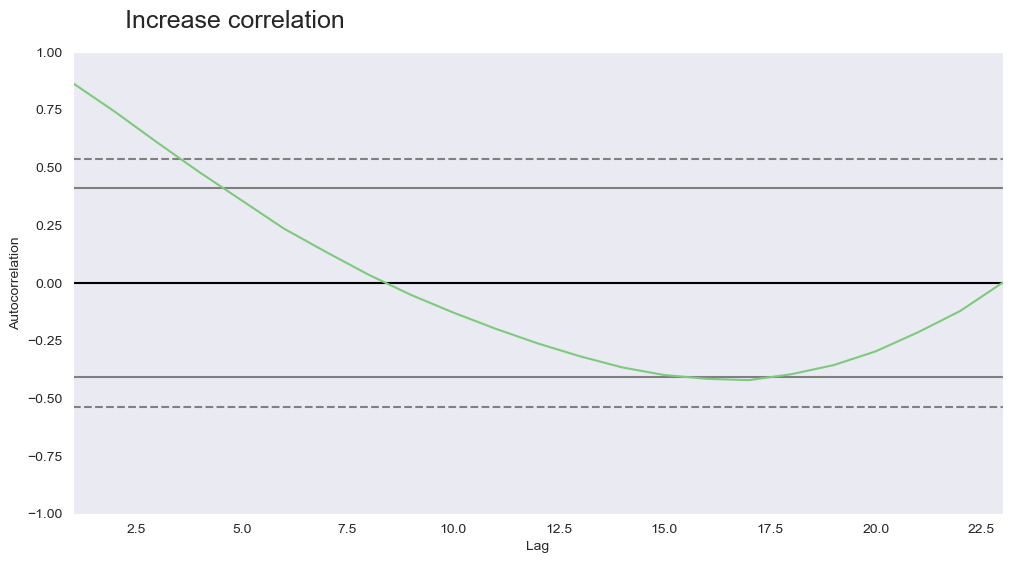

In [22]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Increase correlation', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['increase'][1:])
ax = ax

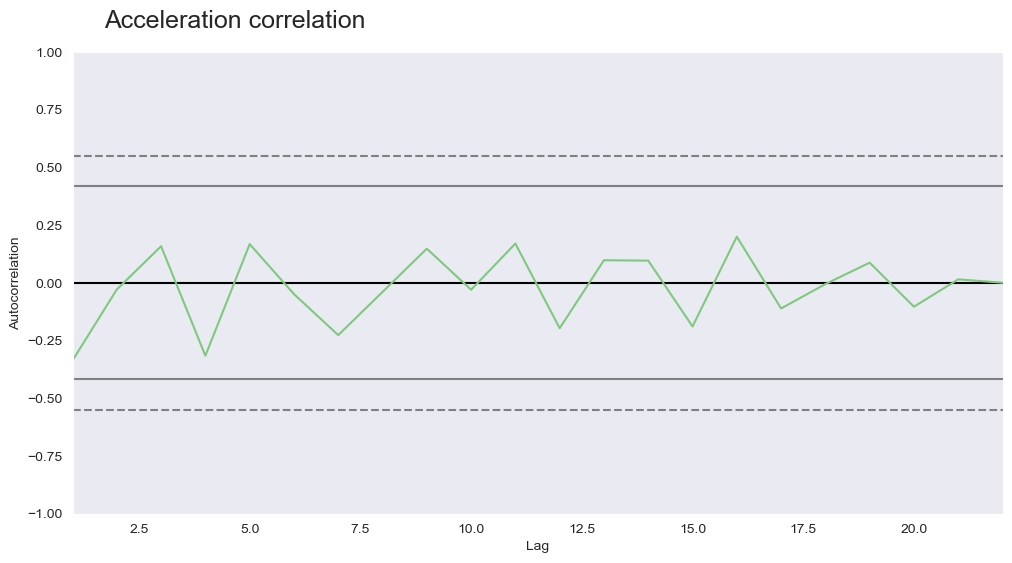

In [23]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Acceleration correlation', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['acceleration'][2:])
ax = ax

## Importance of decomposition and seasonality

### See the importance of the Decomposition technique in the analysis of Alucar newsletter subscribers

In [24]:
subscribers = pd.read_csv('data/newsletter_alucar.csv')
subscribers.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [25]:
subscribers.columns = ['month', 'subscribers']
subscribers.head()

,month,subscribers
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [26]:
print(f'Rows: {subscribers.shape[0]}')
print(f'Columns: {subscribers.shape[1]}')
print(f'Null data: {subscribers.isna().sum().sum()}')

Rows: 24
Columns: 2
Null data: 0


In [27]:
subscribers['month'] = pd.to_datetime(subscribers['month'])
subscribers.dtypes

month          datetime64[ns]
subscribers             int64
dtype: object

In [28]:
subscribers['increase'] = subscribers['subscribers'].diff()
subscribers['acceleration'] = subscribers['increase'].diff()
subscribers.head()

,month,subscribers,increase,acceleration
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


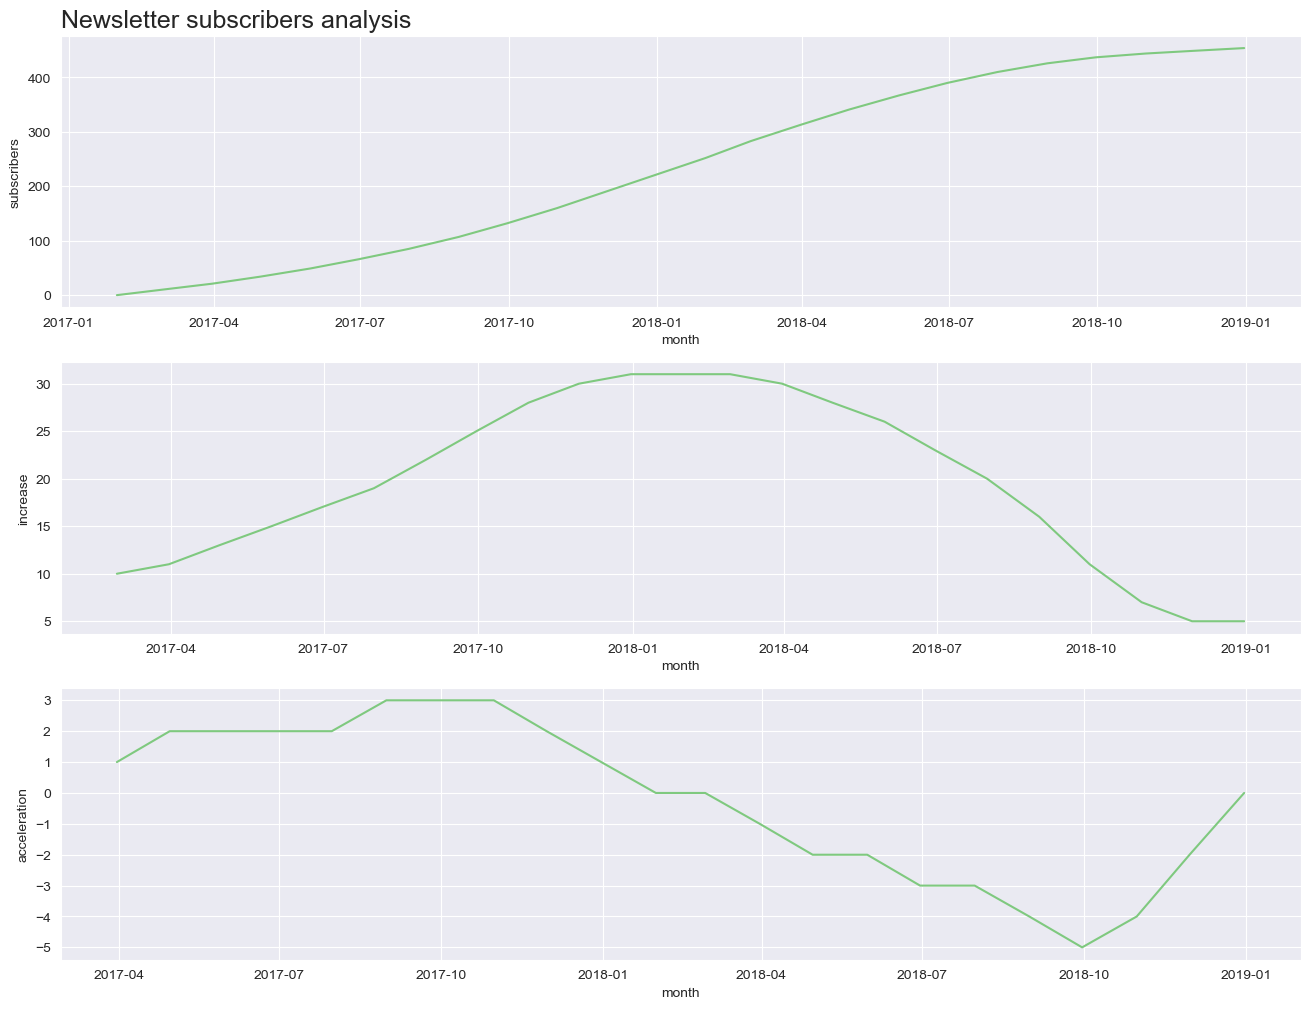

In [29]:
plot_comparison('month', 'subscribers', 'increase', 'acceleration', subscribers, 'Newsletter subscribers analysis')

### Analyze Chocolura sales and discover a repeating pattern in the movement of sales within a fixed period of time, which is called Seasonality

In [30]:
chocolura = pd.read_csv('data/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [31]:
chocolura.columns = ['month', 'sales']
chocolura.head()

,month,sales
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [32]:
print(f'Rows: {chocolura.shape[0]}')
print(f'Columns: {chocolura.shape[1]}')
print(f'Null data: {chocolura.isna().sum().sum()}')

Rows: 24
Columns: 2
Null data: 0


In [33]:
chocolura['month'] = pd.to_datetime(chocolura['month'])
chocolura.dtypes

month    datetime64[ns]
sales             int64
dtype: object

In [34]:
chocolura['increase'] = chocolura['sales'].diff()
chocolura['acceleration'] = chocolura['increase'].diff()
chocolura.head()

,month,sales,increase,acceleration
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


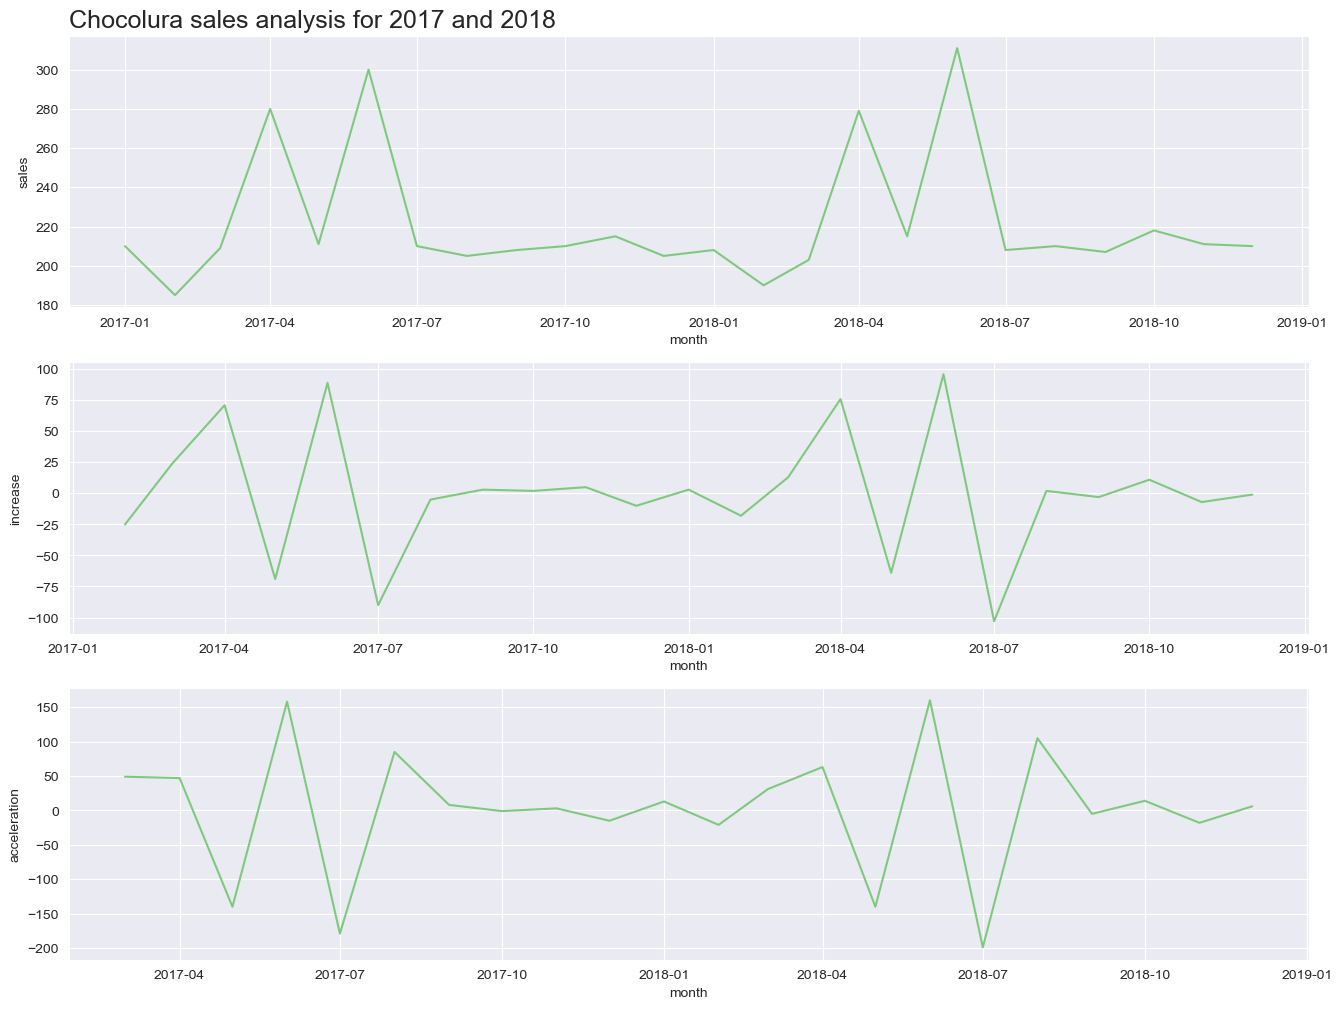

In [35]:
plot_comparison('month', 'sales', 'increase', 'acceleration', chocolura, 'Chocolura sales analysis for 2017 and 2018')

### Examining the sales of a particular Chocolura store in the months of October and November 2018, and discovering that there was also seasonality

In [36]:
sales_per_day = pd.read_csv('data/vendas_por_dia.csv')
sales_per_day.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [37]:
sales_per_day.columns = ['day', 'sales']
sales_per_day.head()

,day,sales
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [38]:
print(f'Rows: {sales_per_day.shape[0]}')
print(f'Columns: {sales_per_day.shape[1]}')
print(f'Null data: {sales_per_day.isna().sum().sum()}')

Rows: 61
Columns: 2
Null data: 0


In [39]:
sales_per_day['day'] = pd.to_datetime(sales_per_day['day'])
sales_per_day.dtypes

day      datetime64[ns]
sales             int64
dtype: object

In [40]:
sales_per_day['increase'] = sales_per_day['sales'].diff()
sales_per_day['acceleration'] = sales_per_day['increase'].diff()
sales_per_day.head()

,day,sales,increase,acceleration
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


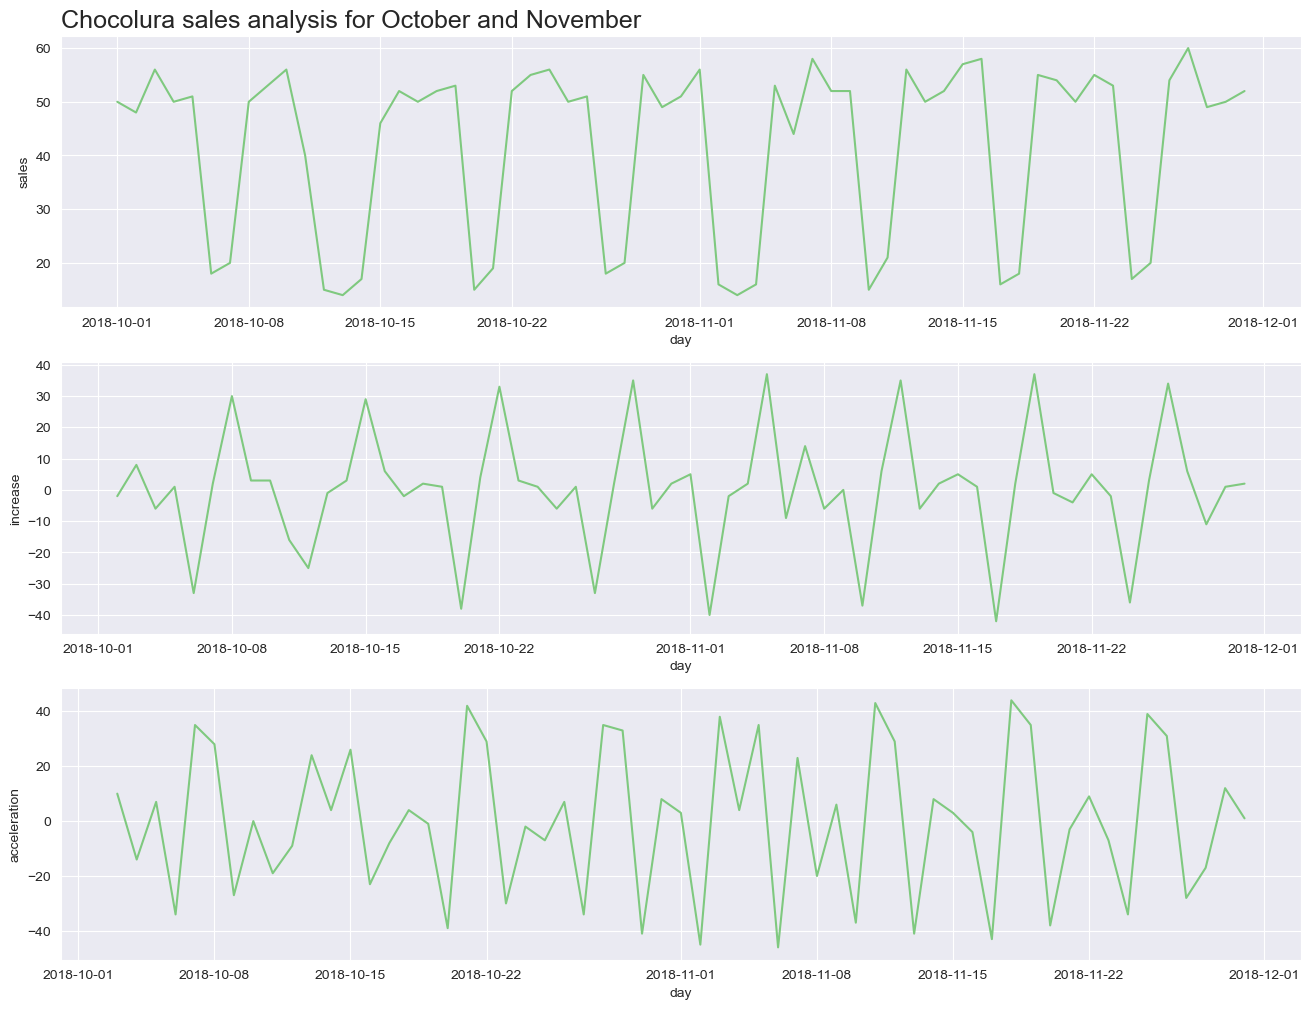

In [41]:
plot_comparison('day', 'sales', 'increase', 'acceleration', sales_per_day, 'Chocolura sales analysis for October and November')

### Investigate what caused this store to be seasonal

In [42]:
sales_per_day['day_of_the_week'] = sales_per_day['day'].dt.day_name()
sales_per_day.head()

,day,sales,increase,acceleration,day_of_the_week
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [43]:
sales_per_day['day'] = pd.to_datetime(sales_per_day['day'])

In [44]:
sales_grouped = sales_per_day.groupby('day_of_the_week')[['sales', 'increase', 'acceleration']].mean().round()
print('Mean of sales, increase and acceleration by day:')
sales_grouped.head()

Mean of sales, increase and acceleration by day:


,sales,increase,acceleration
day_of_the_week,,,
Friday,45.0,-7.0,-5.0
Monday,52.0,34.0,31.0
Saturday,16.0,-28.0,-20.0
Sunday,19.0,3.0,31.0
Thursday,51.0,-2.0,-3.0


## Normalization and statsmodels

### Apply the Autocorrelation function on sales, increasing and accelerating daily sales and seeing that there was a correlation between them

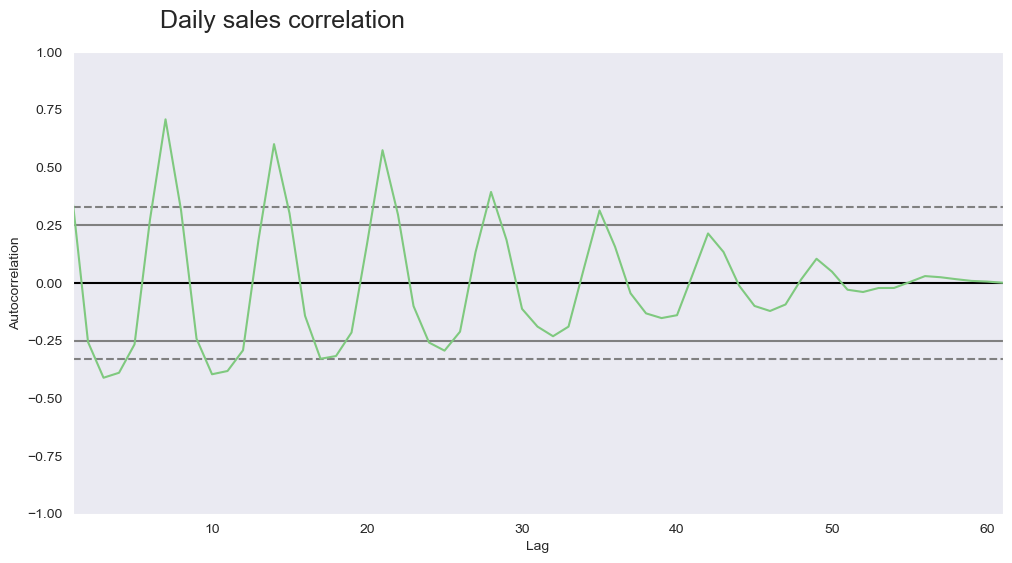

In [45]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Daily sales correlation', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(sales_per_day['sales'])
ax = ax

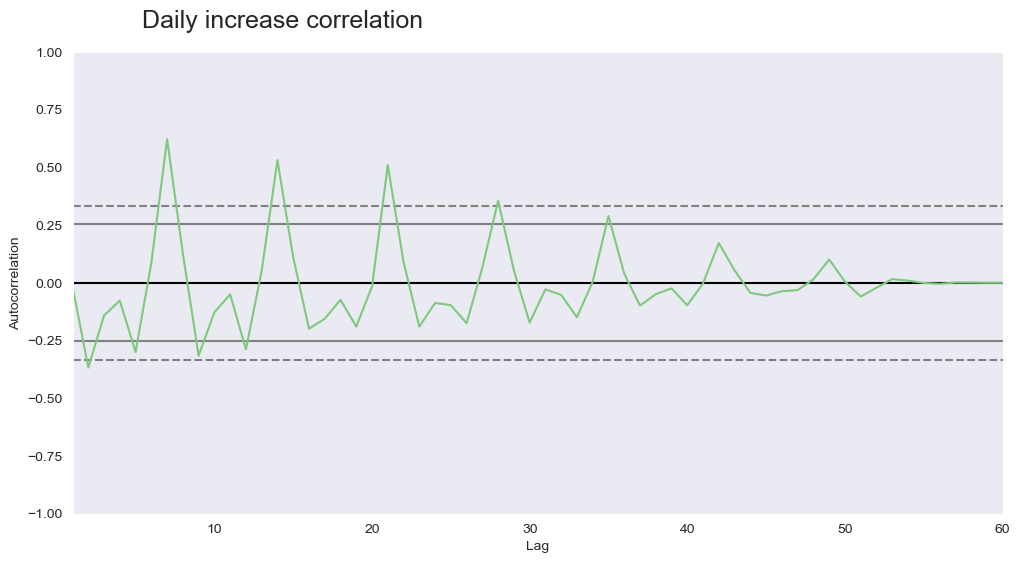

In [46]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Daily increase correlation', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(sales_per_day['increase'][1:])
ax = ax

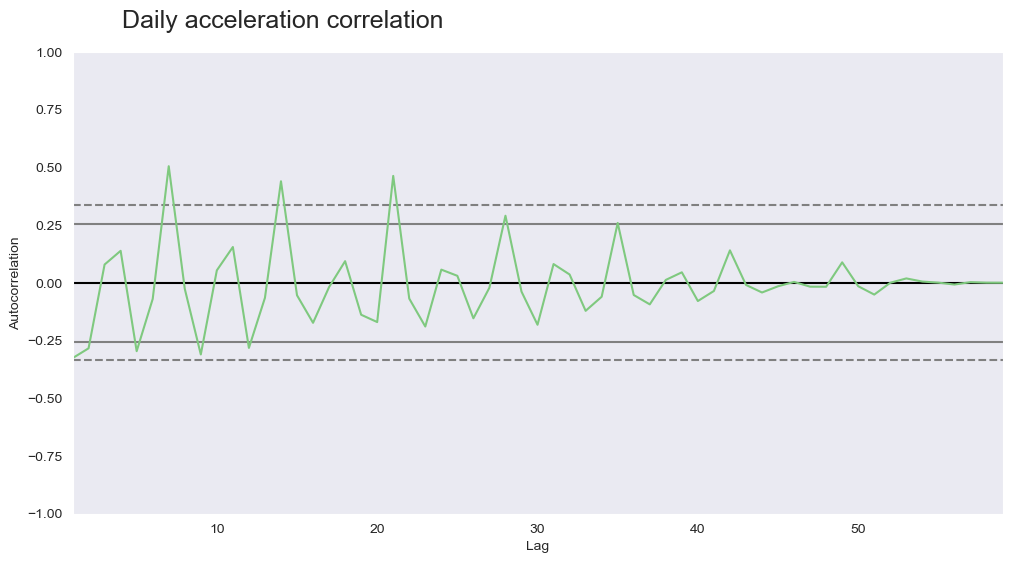

In [47]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Daily acceleration correlation', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(sales_per_day['acceleration'][2:])
ax = ax

### Run a time series normalization technique to minimize the frequencies by the number of weekend days in each month

In [48]:
cafelura = pd.read_csv('data/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [49]:
cafelura.columns = ['month', 'sales']
cafelura.head()

,month,sales
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [50]:
print(f'Rows: {cafelura.shape[0]}')
print(f'Columns: {cafelura.shape[1]}')
print(f'Null data: {cafelura.isna().sum().sum()}')

Rows: 24
Columns: 2
Null data: 0


In [51]:
cafelura['month'] = pd.to_datetime(cafelura['month'])
cafelura.dtypes

month    datetime64[ns]
sales             int64
dtype: object

In [52]:
cafelura['increase'] = cafelura['sales'].diff()
cafelura['acceleration'] = cafelura['increase'].diff()
cafelura.head()

,month,sales,increase,acceleration
0,2017-01-31,880,NaN,NaN
1,2017-02-28,1600,720.0,NaN
2,2017-03-31,3240,1640.0,920.0
3,2017-04-30,3840,600.0,-1040.0
4,2017-05-31,5670,1830.0,1230.0


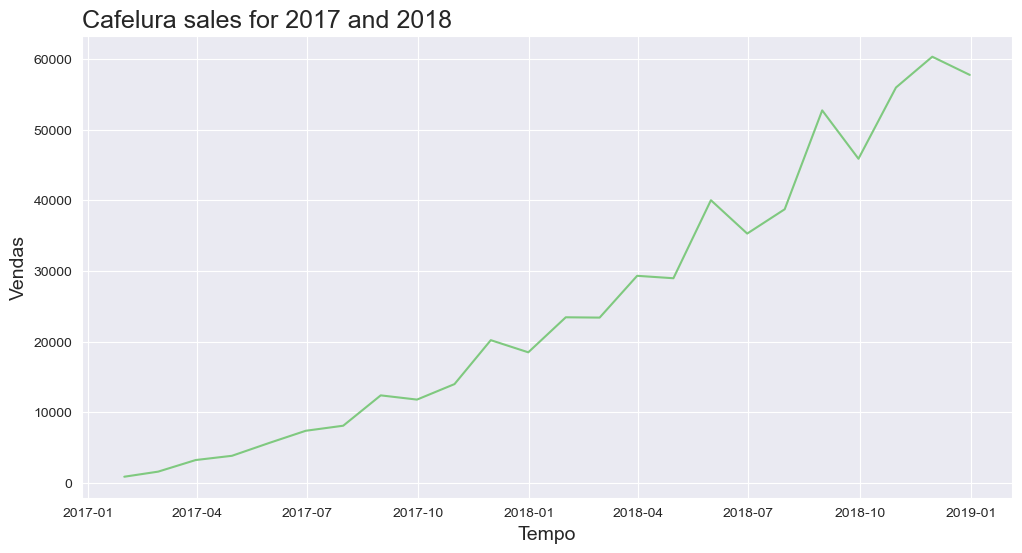

In [53]:
to_plot('Cafelura sales for 2017 and 2018', 'Tempo', 'Vendas', x = 'month', y = 'sales', data = cafelura)

In [54]:
weekends_size = pd.read_csv('data/dias_final_de_semana.csv')
weekends_size.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [55]:
weekends_size.columns = ['days_size']
weekends_size.head()

,days_size
0,8
1,8
2,10
3,8
4,9


In [56]:
weekends_size['days_size'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [57]:
cafelura['normalized_sales'] = cafelura['sales'] / weekends_size['days_size'].values
cafelura.head()

,month,sales,increase,acceleration,normalized_sales
0,2017-01-31,880,NaN,NaN,110.0
1,2017-02-28,1600,720.0,NaN,200.0
2,2017-03-31,3240,1640.0,920.0,324.0
3,2017-04-30,3840,600.0,-1040.0,480.0
4,2017-05-31,5670,1830.0,1230.0,630.0


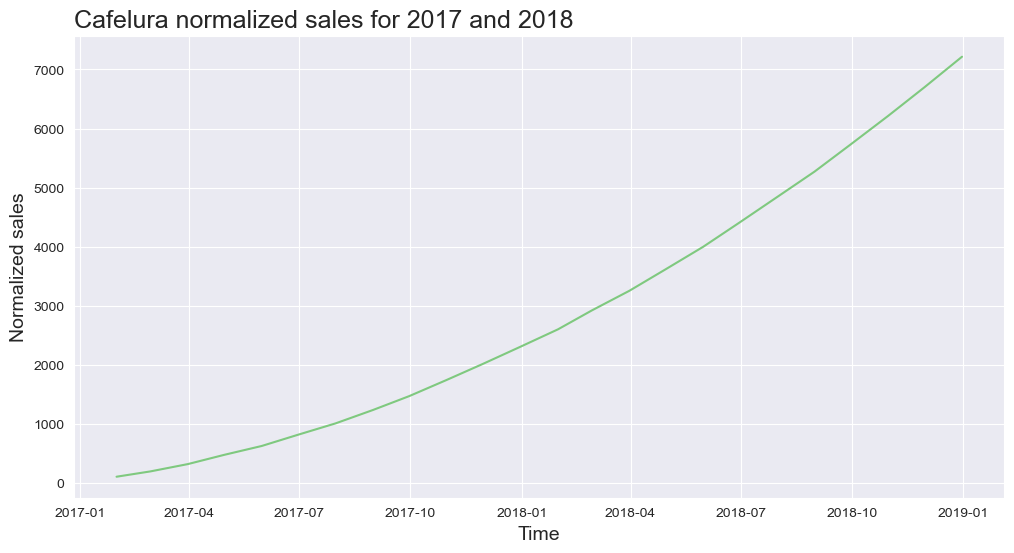

In [58]:
to_plot('Cafelura normalized sales for 2017 and 2018', 'Time', 'Normalized sales', 'month', 'normalized_sales', cafelura)

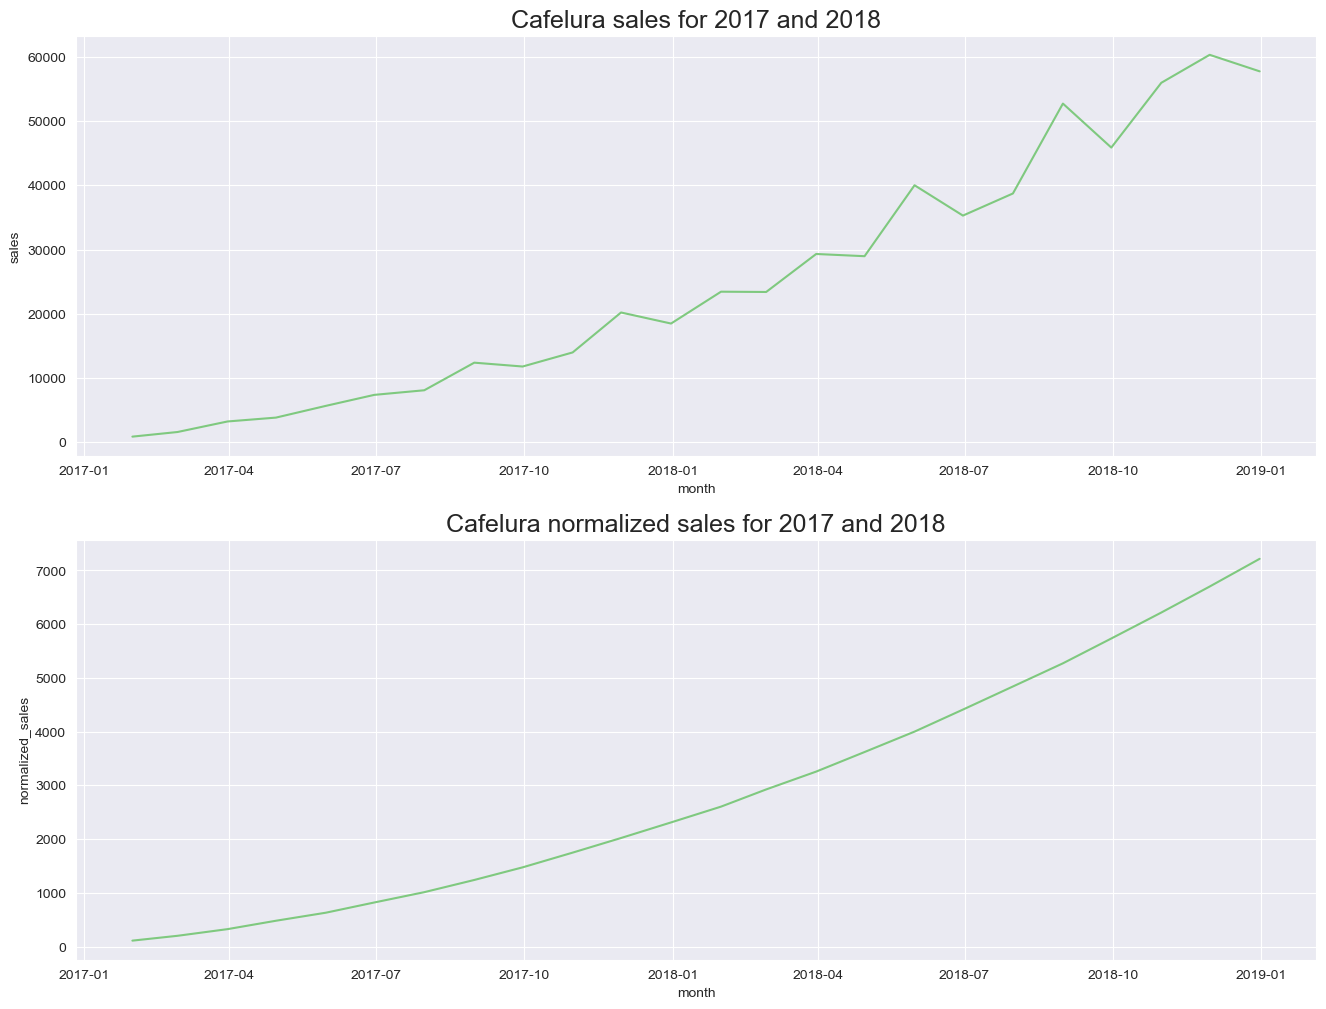

In [59]:
plt.figure(figsize=(16,12))
ax = plt.subplot(2, 1, 1)
ax.set_title('Cafelura sales for 2017 and 2018', fontsize = 18)
sns.lineplot(x = 'month', y = 'sales', data = cafelura)
ax = plt.subplot(2, 1, 2)
ax.set_title('Cafelura normalized sales for 2017 and 2018', fontsize=18)
sns.lineplot(x = 'month', y = 'normalized_sales', data = cafelura)
ax = ax

### Analyze a time series by importing the seasonal_decompose function from the statsmodels.tsa.seasonal library, which shows what is the observation, trend, seasonality and noise at once

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

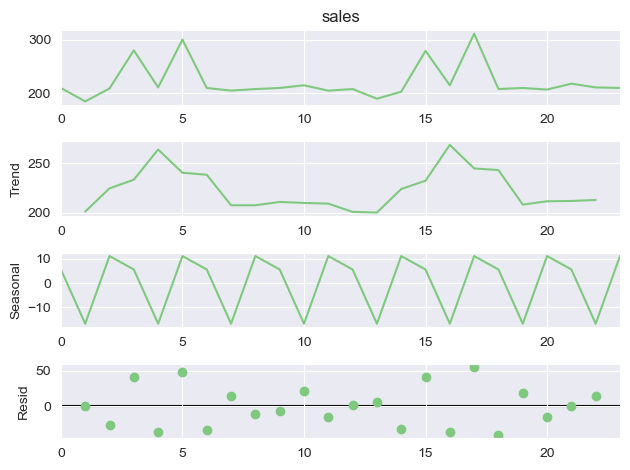

In [61]:
result = seasonal_decompose(chocolura['sales'], period=3)
ax = result.plot()

In [62]:
observed = result.observed
trend = result.trend
seasonal = result.seasonal
resid = result.resid

In [63]:
data = ({
    'observed': observed,
    'trend': trend,
    'seasonal': seasonal,
    'resid': resid
})

result = pd.DataFrame(data)
result.head()

,observed,trend,seasonal,resid
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


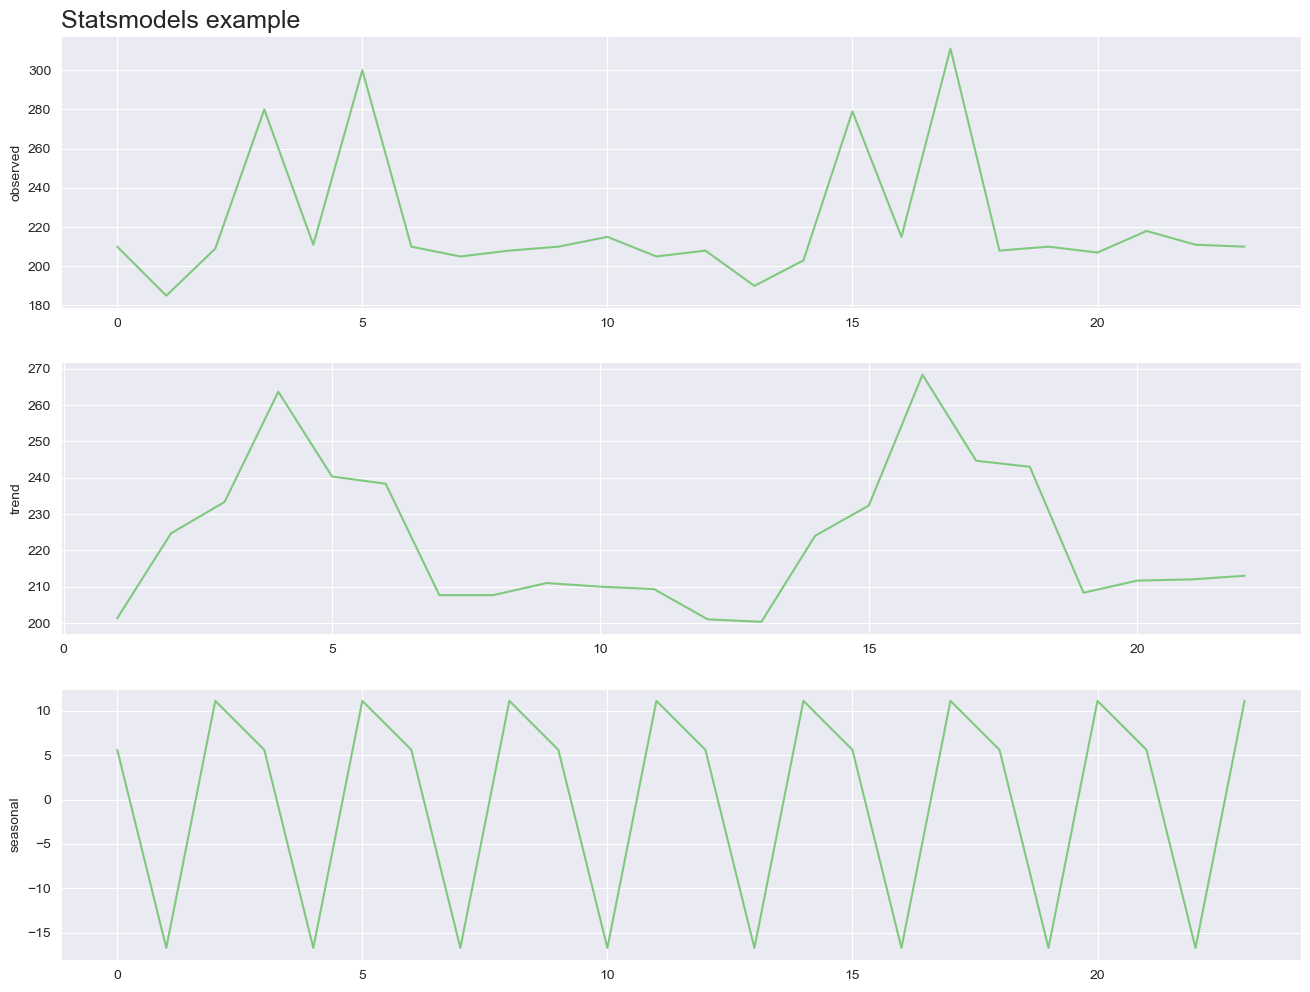

In [64]:
plot_comparison(result.index, 'observed', 'trend', 'seasonal', result, 'Statsmodels example')

## Noise and moving average

### A component present in most Time Series is noise.

In [65]:
alucel = pd.read_csv('data/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [66]:
alucel.columns = ['day', 'sales']
alucel.head()

,day,sales
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [67]:
print(f'Rows: {alucel.shape[0]}')
print(f'Columns: {alucel.shape[1]}')
print(f'Null data: {alucel.isna().sum().sum()}')

Rows: 61
Columns: 2
Null data: 0


In [68]:
alucel['day'] = pd.to_datetime(alucel['day'])
alucel.dtypes

day      datetime64[ns]
sales           float64
dtype: object

In [69]:
alucel['increase'] = alucel['sales'].diff()
alucel['acceleration'] = alucel['increase'].diff()
alucel.head()

,day,sales,increase,acceleration
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


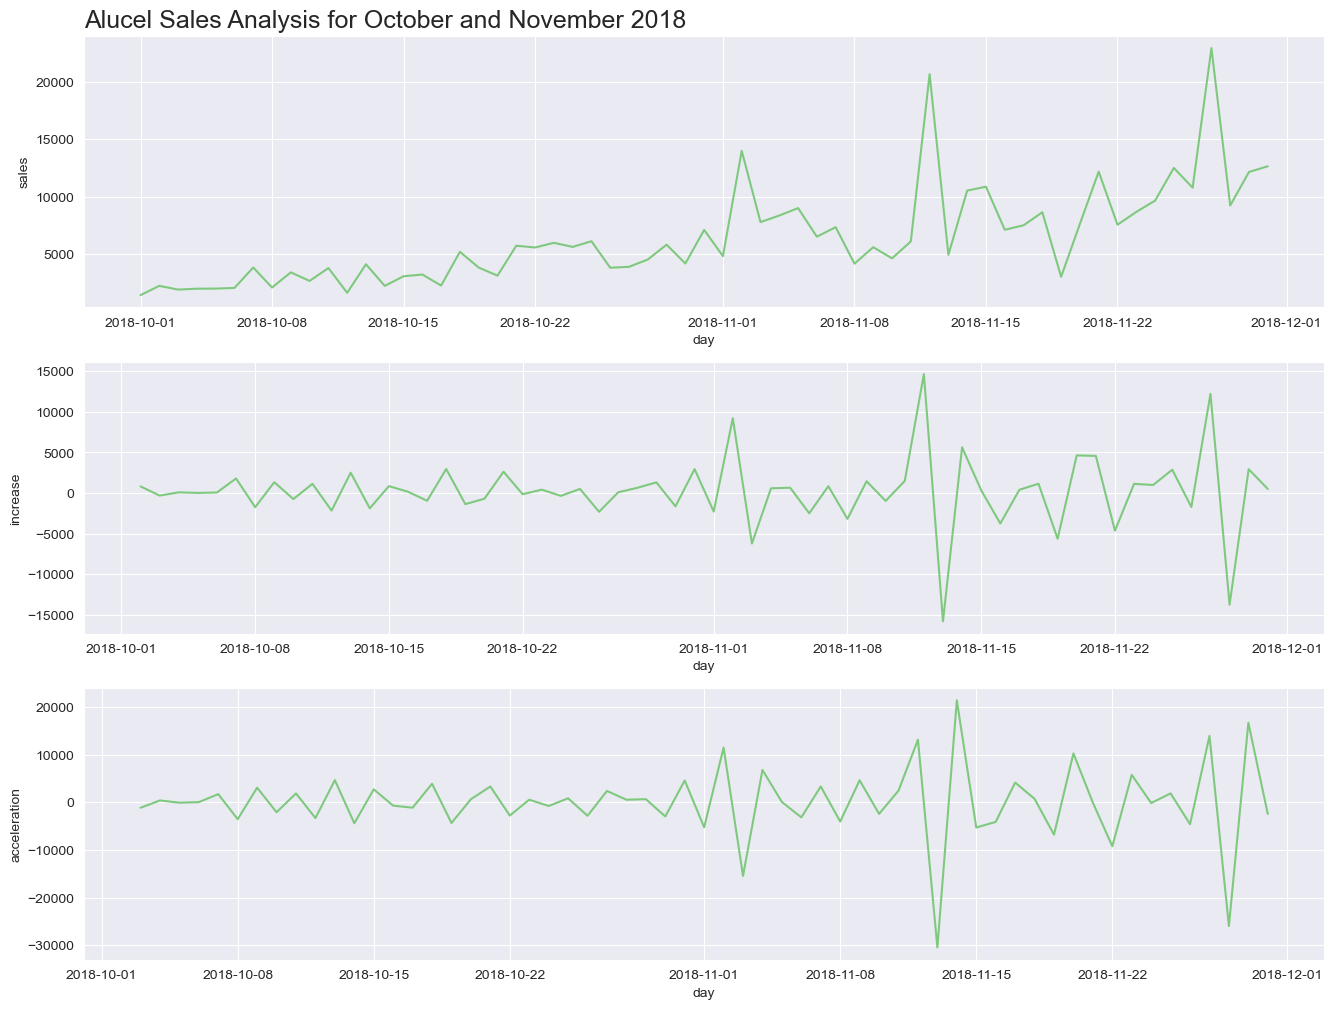

In [70]:
plot_comparison('day', 'sales', 'increase', 'acceleration', alucel, 'Alucel Sales Analysis for October and November 2018')

### Minimize the noise of a time series by applying the moving average technique

In [71]:
alucel['moving_average_7'] = alucel['sales'].rolling(7).mean()
alucel.head(7)

,day,sales,increase,acceleration,moving_average_7
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


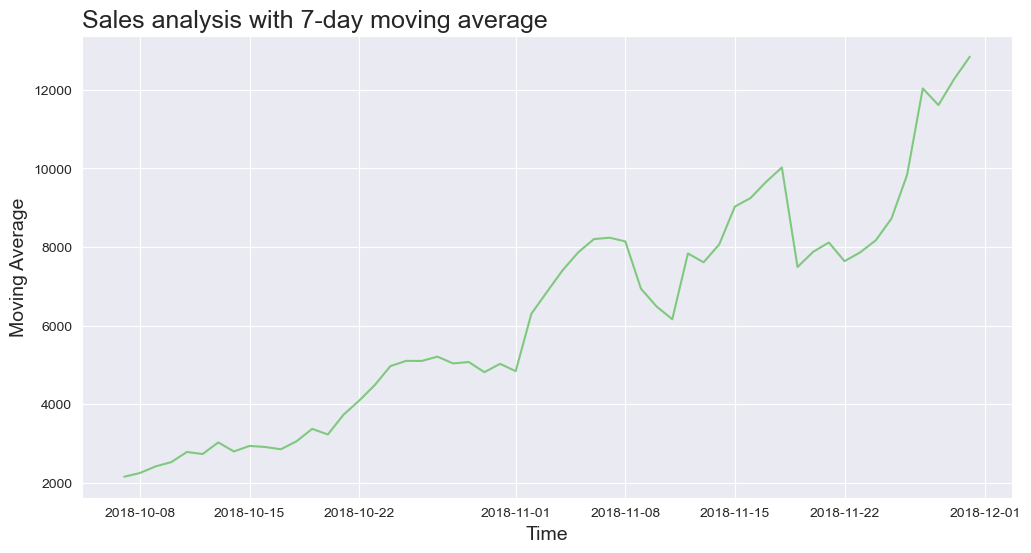

In [72]:
to_plot('Sales analysis with 7-day moving average', 'Time', 'Moving Average', 'day', 'moving_average_7', alucel)

### Create a graph with the 7 and 21 day moving average and compare it with our observation, as shown in the image below

In [73]:
alucel['moving_average_21'] = alucel['sales'].rolling(21).mean()
alucel.head(21)

,day,sales,increase,acceleration,moving_average_7,moving_average_21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,NaN
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143,NaN
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857,NaN
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571,NaN


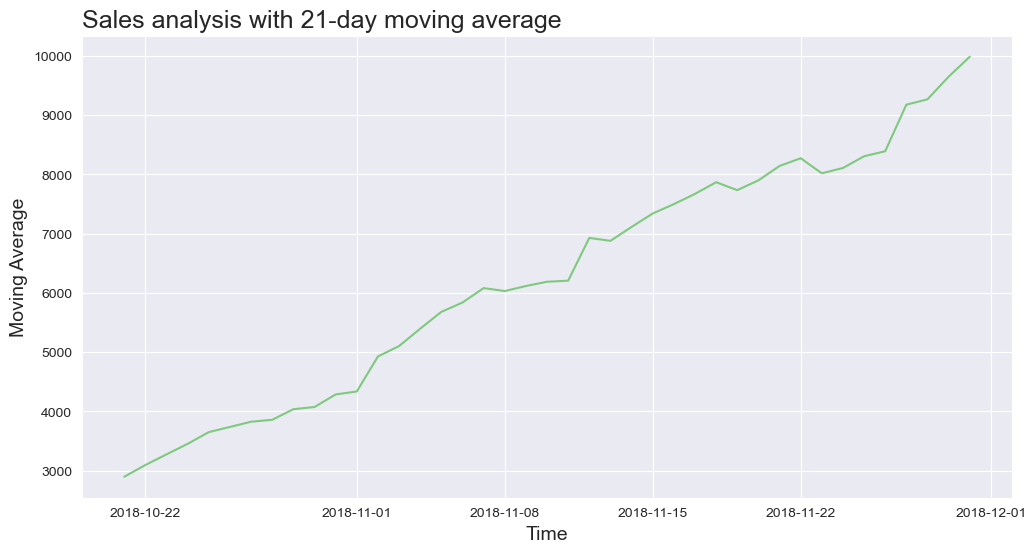

In [74]:
to_plot('Sales analysis with 21-day moving average', 'Time', 'Moving Average', 'day', 'moving_average_21', alucel)

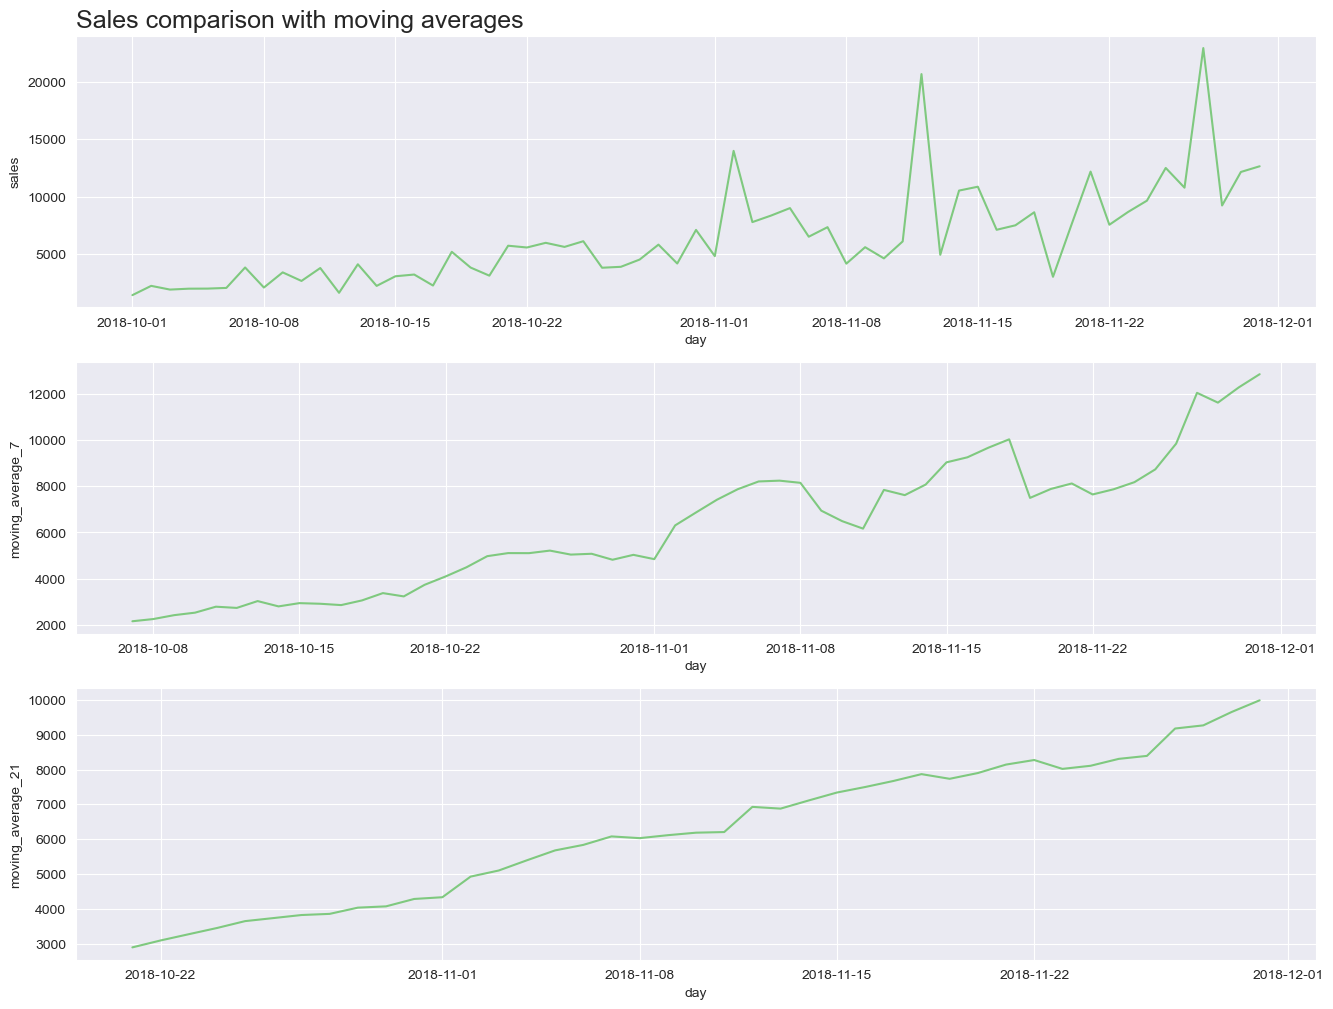

In [75]:
plot_comparison('day', 'sales', 'moving_average_7', 'moving_average_21', alucel, 'Sales comparison with moving averages')